# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 5 Integrals
In the following lecture, we will start to learn about the ideas of computational physics and 
apply the python programing to solve the real problems.

One of the most basic but also most important applications of computers
in physics is the evaluation of integrals and derivatives.

As we have learned in the calculus class, we can derive the analytical integrals for a lot of functions 
such as linear, quadratic, ploynomial, triangle functions. But most of functions cannot. 
__They can, however, almost always be done on a computer.__


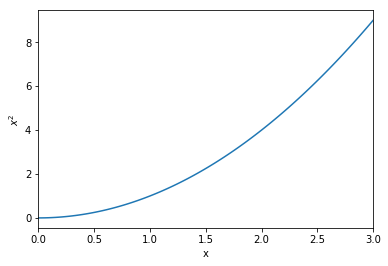

In [34]:
# Let's start with a simple example, try to do integration on x^2 over [0,3]
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,3,100)
y = x*x
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('$x^2$')
plt.xlim([0,3])
plt.show()

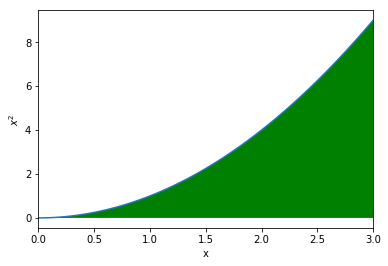

In [35]:
# Mathematically, the integral means the area under the curve
x = np.linspace(0,3,100)
y = x*x
y0 = np.zeros(100)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('$x^2$')
plt.xlim([0,3])
plt.fill_between(x, y0, y, where=y>=y0, facecolor='green')
plt.show()

## Mathematically, the integral means the area under the curve

Suppose we have a function $f(x)$ and we want to calculate its integral with
respect to $x$ from $x$ = a to $x$ = b, which we denote I(a, b):

$$ I(a,b) = \int_a^b f(x)dx $$

This is equivalent to calculating the area under the curve of f(x) from a to b.
There is no known way to calculate such an area exactly in all cases on a computer.

- how to estimate the area?
- how to make it as accurate as possible?

## 5.1 Rectangle rules

The most straightforward way is to:
- divide the area up into rectangular slices, 
- calculate the area of each one
- add them up. 

This, however, is a pretty poor approximation. The area
under the rectangles is not very close to the area under the curve.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Rectangle(start, end, parts, plot=1):
    """
    Rectrangle sum rule
    
    """
    #define the function
    f = lambda x: x * x  
    
    #define the X,Y points
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts)
    resultsy = f(resultsx)
    
    # To calculate the area
    area = np.empty([parts], float)
    for i in range(parts):
            area[i] = resultsy[i] * deltax
    

    # By default, we also output the plot.
    if plot==1:
        x = np.linspace(start,end,100)
        y = x*x        
        plt.plot(x, y, 'r')
        #plt.xlim([start,end])
        plt.bar(resultsx+deltax/2, resultsy, deltax, edgecolor ='black')
        #plt.bar(resultsx, resultsy, deltax, edgecolor ='black')
        plt.show()
        print("The Sum of the area is: ", sum(area))
    
    return sum(area)

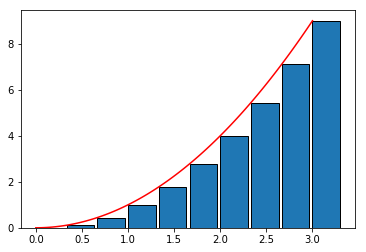

The Sum of the area is:  9.5


9.4999999999999982

In [2]:
Rectangle(0,3,10)

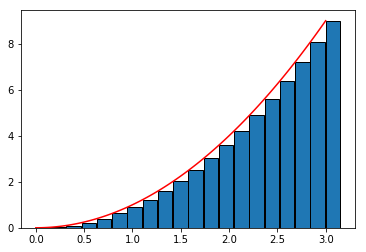

The Sum of the area is:  9.23684210526


9.2368421052631557

In [3]:
Rectangle(0,3,20)

## 5.2 The Trapezoidal rule

The rectangle approximation is easy to calculate. This, however, is a pretty poor approximation. The area
under the rectangles is not very close to the area under the curve.

A better approach is to use the trapezoids rather than rectangles.
The area under the trapezoids is a considerably better approximation to the
area under the curve, and this approach, though simple, often gives perfectly
adequate results.


In [40]:
import numpy as np
import matplotlib.pyplot as plt

def Trapezoid(start, end, parts, plot=1):
    """
    Trapezoid sum rule
    
    """
    #define the function
    f = lambda x: x * x  
    
    #define the X, Y points 
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts+1)
    resultsy = f(resultsx)

    # To calculate the area
    area = np.empty([parts], float)
    for i in range(parts):
            area[i] = (resultsy[i]+resultsy[i+1]) * deltax/2

    # By default, we also output the plot.
    if plot==1:
        x = np.linspace(start,end,100)
        y = f(x)        
        plt.plot(x, y, 'r')
        plt.xlim([start,end])
        
        y2 = np.array([0,0])
        for i in range(parts):
            x0 = resultsx[i:i+2]
            y1 = resultsy[i:i+2]
            plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='blue')
            linex, liney = [resultsx[i+1], resultsx[i+1]], [0, resultsy[i+1]]
            plt.plot(linex, liney, color='black', linewidth=2.0)        
        
        plt.show()
        print("The Sum of the area is: ", sum(area))
    
    return sum(area)

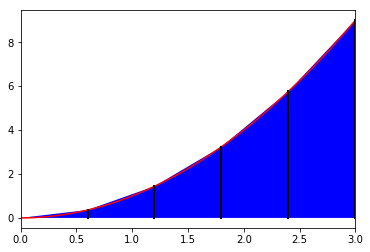

The Sum of the area is:  9.18


9.1799999999999997

In [41]:
Trapezoid(0,3,5)

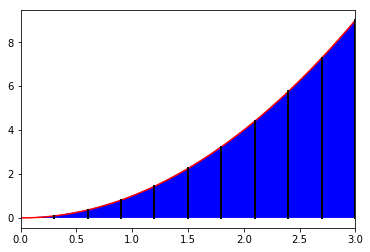

The Sum of the area is:  9.045


9.0449999999999999

In [97]:
Trapezoid(0,3,10)

## 5.3 The Simpson’s rule

The trapezoidal rule is simple, taking only a few lines of code as we have seen. 
And it is often perfectly adequate for calculations where no great accuracy is required. 
It happens frequently in physics calculations that we don’t need an answer accurate to many significant
figures and in such cases the ease and simplicity of the trapezoidal rule can
make it the method of choice. 

However, there are also cases where greater accuracy is required. 

As we have seen we can increase the accuracy of the trapezoidal rule by _increasing the number N of steps used in the calculation_. 

But in some cases, _the calculation can become slow_.

There are other, more advanced schemes for calculating integrals
that can achieve high accuracy while still arriving at an answer quickly. 

We can often get a better result if we approximate the function instead with curves of some kind.

Simpson’s rule does exactly this, using quadratic curves.

In order to specify a quadratic completely 

__one needs three points, not just two as with a straight line.__

Suppose, as before, that our integrand is denoted f(x) and the spacing of
adjacent points is $h$. And suppose for the purposes of argument that we have
three points at $x$ = −h, 0, and +h. If we fit a quadratic $Ax^2 + Bx + C$ through
these points, then by definition we will have:

$$f(-h) = Ah^2 - Bh + C$$
$$f(0) = C$$ 
$$f(h) = Ah^2 + Bh + C$$

Solving these equations gives

$$ A = \frac{1}{h^2}[\frac{f(-h)}{2} - f(0) + \frac{f(h)}{2}]$$
$$ B=\frac{1}{2h}[f(h)-f(-h)] $$ 
$$ C = f(0)$$

and the area under the curve of f(x) from −h to +h is given approximately by
the area under the quadratic:

$$ \int^h_{-h} (Ax^2 + Bx + C) dx = \frac{2}{3}Ah^3 + 2Ch = \frac{1}{3}h[f(-h)+4f(0)+f(h)]$$

This is _Simpson’s_ rule. It gives us an approximation to the area under two adjacent
slices of our function. Note that the final formula for the area involves
only h and the value of the function at evenly spaced points, just as with the
trapezoidal rule. So to use Simpson’s rule we don’t actually have to worry
about the details of fitting a quadratic—we just plug numbers into this formula
and it gives us an answer.


Applying Simpson’s rule involves dividing
the domain of integration into many slices and using the rule to separately
estimate the area under successive pairs of slices, then adding the estimates
for all pairs to get the final answer. If, as before, we are integrating from $x$ = a
to $x$ = b in slices of width $h$ then the three points bounding the first pair of
slices fall at $x = a, a + h, a + 2h$, those bounding the second pair at $a + 2h,
a + 3h, a + 4h$, and so forth. Then the approximate value of the entire integral
is given by

$$ 
\begin{aligned}
I(a,b) \approx & \frac{1}{3}h[f(a)+4f(a+h)+f(a+2h)] \\
               & \frac{1}{3}h[f(a+2h)+4f(a+3h)+f(a+4h)] \\
               &  ...\\
               &  ...\\
               & \frac{1}{3}h[f(a+(N-2)h)+4f(a+(N-1)h)+f(b)] 
\end{aligned}
$$

see more details in: https://en.wikipedia.org/wiki/Simpson%27s_rule

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def Simpson(start, end, parts, plot=1):
    """
    Simpson sum rule
    
    """
    #define the function
    f = lambda x: x**4 - 2*x + 1  
    
    #define the X, Y points 
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts+1)
    resultsy = f(resultsx)

    #-----------------------------------------------------
    #define the Simpson points and calculate the area here
    #-----------------------------------------------------
    area = []

    #By default, we also output the plot.
    if plot==1:
        x = np.linspace(start,end,100)
        y = f(x)        
        plt.plot(x, y, 'r')
        
        #-----------------------------------------------------
        #draw the curves based on Simpson points here
        #-----------------------------------------------------             
    
        plt.xlim([start,end])
        plt.ylim([min(y),max(y)])
        plt.show()
    
    return sum(area)


In [33]:
Simpson(0, 2, 10)

0

## 5.4 Futher expansion to higher order: 
As we have seen, the trapezoidal rule is based on approximating an integrand
$f(x)$ with straight-line segments, while Simpson’s rule uses quadratics.
We can create higher-order (and hence potentially more accurate) rules by using
higher-order polynomials, fitting $f(x)$ with cubics, quartics, and so forth.
The general form of the trapezoidal and Simpson rules is

$$\int_a^b f(x)dx \approx \sum_{k=1}^{N}w_kf(k)$$

where the $x_k$ are the positions of the sample points at which we calculate the
integrand and the $w_k$ are some set of weights. 

- In the trapezoidal rule, the first and last weights are 1/2 and the others are all 1,
- In Simpson’s rule the weights are 1/3 for the first and last slices and alternate between 4/3 and 2/3 for the other slices
- What will happen on cubic?

|Order| Apporximation | Coefficients   |
|-----|:-------------:|--------------------------------------------------:|
|0    | rectangle     |   1,1,........1,1|
|1    | straight line |1/2,1,1,.....1,1/2|
|2    | quadratic     |1/3, 4/3, 2/3, ..,4/3,1/3|
|3    | cubic         |...................|

## 5.5 Homework: 
Calculate the following integral based on three different rules

$$\int_0^3 (x^2-x+1 dx)$$

$$\int_0^3 (x^4-x+1 dx)$$

$$\int_0^3 \text{exp}(-x^2) dx$$

For the 1st one, how many sampling points do you need for Simpson rule?

## 5.6 Further reading on uneven sampling and Gaussian Quardrature

We have been assuming here that the sample points are evenly spaced. 
This is easy to program. However, it is also possible to derive integration methods with unevenly spaced points.
Sometimes, they can give very accurate answers with only small numbers of points.
One of the well known methods called __Gaussian Quardrature__.

### Project 1: 
Write a wiki page to introduce Gaussian Quardrature from the foundamental of mathematics, and give some applications

In [6]:
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w


def f(x):
    return x**5 - 2*x + 1

N = 3
a,b = 0.0, 2.0

# Calculate the sample points and weights, then map them
# to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Perform the integration
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])
print(s)

8.66666666667
